# **Project 1: Finding Similar Items**

In [ ]:
from google.colab import files

# Upload Kaggle API Token
# In case uploading json file from local environment
'''
files.upload()

# Set Up Kaggle Environment
import os
import zipfile

# Create the .kaggle directory and move the kaggle.json file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API
!pip install kaggle
'''

# Link to kaggle direcly
# In case loading user data directly from colab secrets
from google.colab import userdata
import os
import zipfile

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# Download and Unzip Dataset
!kaggle datasets download -d asaniczka/1-3m-linkedin-jobs-and-skills-2024

with zipfile.ZipFile("1-3m-linkedin-jobs-and-skills-2024.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
License(s): ODC Attribution License (ODC-By)
100% 1.88G/1.88G [00:38<00:00, 81.5MB/s]
100% 1.88G/1.88G [00:38<00:00, 52.4MB/s]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('job_summary.csv').sample(1000)

# Vectorize the job summaries
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['job_summary'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Find pairs of similar job summaries
similar_pairs = []
threshold = 0.8  # Define a similarity threshold
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim)):
        if cosine_sim[i, j] > threshold:
            similar_pairs.append((i, j, cosine_sim[i, j]))

# Output the similar pairs
limited_pairs = similar_pairs[:5]
for pair in limited_pairs:
    print(f"Job {pair[0]} and Job {pair[1]} are similar with a score of {pair[2]:.2f}")
    print("Job", pair[0], "Summary:", df.iloc[pair[0]]['job_summary'])
    print("Job", pair[1], "Summary:", df.iloc[pair[1]]['job_summary'])
    print()


Job 4 and Job 84 are similar with a score of 1.00
Job 4 Summary: Love your job at Texas Roadhouse! Join our team and take pride in your work.
Do you feel that you have the potential to be a grill master for Texas Roadhouse? Our legendary steaks are our most popular menu item at Texas Roadhouse, and our Broil Cook position is an important one!
As a Top-notch Broil Cook, Your Responsibilities Would Include
Meat searing
Meat seasoning
Meat cooking
Using proper sanitation guidelines
Understanding equipment and Prep Sheets
Exhibiting teamwork
If you think you would be a legendary Broil Cook, apply to become a part of our Team today!
Our restaurant Roadies are the heart and soul of our company, bringing Legendary Food and Legendary Service to our local communities.
At Texas Roadhouse we have a fun culture with flexible work schedules, discounts in our restaurants, friendly competitions, recognition, formal training, and career growth opportunities.
Requirements
Our Restaurant Roadies are pai

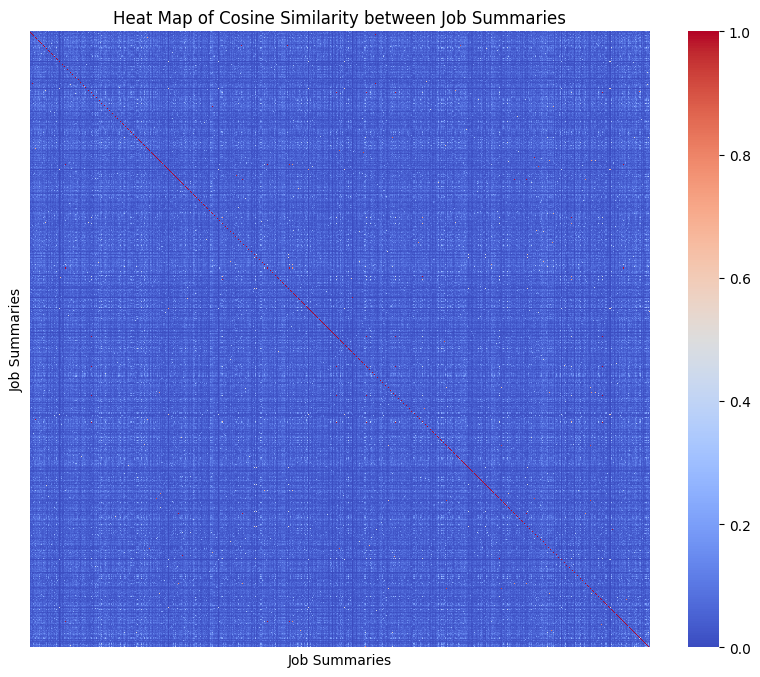

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heat map of cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Heat Map of Cosine Similarity between Job Summaries')
plt.xlabel('Job Summaries')
plt.ylabel('Job Summaries')
plt.show()

Range partition

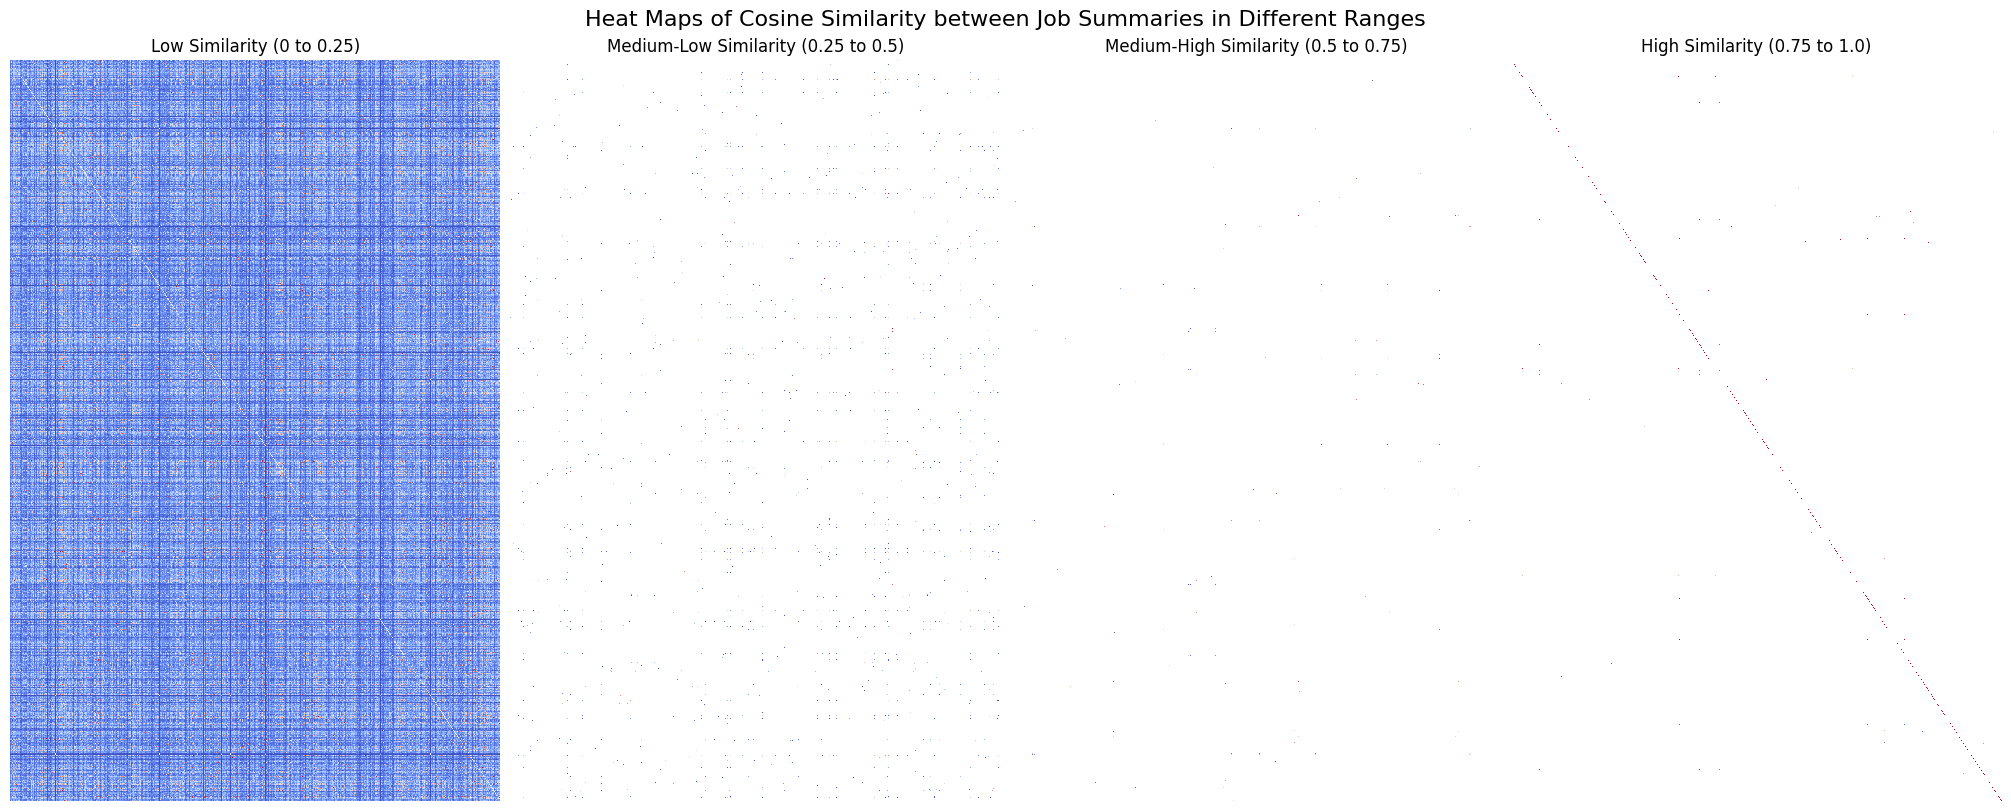

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Categorize cosine similarity into four ranges
low_sim = np.where((cosine_sim >= 0) & (cosine_sim < 0.25), cosine_sim, np.nan)
med_low_sim = np.where((cosine_sim >= 0.25) & (cosine_sim < 0.5), cosine_sim, np.nan)
med_high_sim = np.where((cosine_sim >= 0.5) & (cosine_sim < 0.75), cosine_sim, np.nan)
high_sim = np.where((cosine_sim >= 0.75) & (cosine_sim <= 1.0), cosine_sim, np.nan)

# Plot heat maps for each range
fig, axs = plt.subplots(1, 4, figsize=(20, 8), constrained_layout=True)

sns.heatmap(low_sim, cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[0], cbar=False)
axs[0].set_title('Low Similarity (0 to 0.25)')

sns.heatmap(med_low_sim, cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[1], cbar=False)
axs[1].set_title('Medium-Low Similarity (0.25 to 0.5)')

sns.heatmap(med_high_sim, cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[2], cbar=False)
axs[2].set_title('Medium-High Similarity (0.5 to 0.75)')

sns.heatmap(high_sim, cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[3], cbar=False)
axs[3].set_title('High Similarity (0.75 to 1.0)')

fig.suptitle('Heat Maps of Cosine Similarity between Job Summaries in Different Ranges', fontsize=16)
plt.show()


# **Project 2: Market-Basket Analysis**

In [ ]:
!ls

1-3m-linkedin-jobs-and-skills-2024.zip	job_summary.csv		   sample_data
job_skills.csv				linkedin_job_postings.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('job_skills.csv').sample(1000)

# Fill NaN values in the job_skills column with an empty string
df['job_skills'] = df['job_skills'].fillna('')

# Convert job_skills column to a list of lists with unique values
df['job_skills'] = df['job_skills'].apply(lambda x: list(set(x.split(','))))

# Create a one-hot encoded DataFrame
one_hot = df['job_skills'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(bool)

# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Output the rules
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           antecedents       consequents  antecedent support  \
0        ( Leadership)  ( Communication)               0.132   
1          ( Teamwork)  ( Communication)               0.166   
2    ( Problemsolving)  ( Communication)               0.073   
3  ( Customer service)  ( Communication)               0.084   

   consequent support  support  confidence      lift  leverage  conviction  \
0               0.292    0.082    0.621212  2.127439  0.043456    1.869120   
1               0.292    0.107    0.644578  2.207460  0.058528    1.992000   
2               0.292    0.056    0.767123  2.627135  0.034684    3.040235   
3               0.292    0.052    0.619048  2.120026  0.027472    1.858500   

   zhangs_metric  
0       0.610543  
1       0.655864  
2       0.668131  
3       0.576755  


Let's interpret the association rules you have generated. The association rules analysis helps to find relationships between different items in a dataset. Here's a breakdown of each column in your result and what it signifies:

### Interpretation of Columns

1. **antecedents**: The item(s) on the left side of the rule (the "if" part).
2. **consequents**: The item(s) on the right side of the rule (the "then" part).
3. **antecedent support**: The proportion of transactions that contain the antecedent(s).
4. **consequent support**: The proportion of transactions that contain the consequent(s).
5. **support**: The proportion of transactions that contain both the antecedent(s) and the consequent(s). This is the joint probability of the antecedents and consequents.
6. **confidence**: The probability that the consequent(s) is present when the antecedent(s) is present. It is calculated as `support / antecedent support`.
7. **lift**: The ratio of the observed support to that expected if the antecedent(s) and consequent(s) were independent. Lift values greater than 1 indicate a positive association.
8. **leverage**: The difference between the observed support and the expected support if the antecedent(s) and consequent(s) were independent.
9. **conviction**: The ratio of the expected frequency of the antecedent(s) occurring without the consequent(s) to the observed frequency of the antecedent(s) occurring without the consequent(s). Higher values indicate stronger rules.
10. **zhangs_metric**: A measure of the interest of an association rule, where values close to 1 indicate strong interest.

### Specific Rules

Let's interpret each rule specifically:

1. **Rule 1**:
   - **Antecedent**: Leadership
   - **Consequent**: Communication
   - **Confidence**: 62.12%
     - If a job requires "Leadership", there is a 62.12% chance it also requires "Communication".
   - **Lift**: 2.13
     - "Communication" is 2.13 times more likely to occur with "Leadership" than expected by chance.

2. **Rule 2**:
   - **Antecedent**: Teamwork
   - **Consequent**: Communication
   - **Confidence**: 64.46%
     - If a job requires "Teamwork", there is a 64.46% chance it also requires "Communication".
   - **Lift**: 2.21
     - "Communication" is 2.21 times more likely to occur with "Teamwork" than expected by chance.

3. **Rule 3**:
   - **Antecedent**: Problemsolving
   - **Consequent**: Communication
   - **Confidence**: 76.71%
     - If a job requires "Problemsolving", there is a 76.71% chance it also requires "Communication".
   - **Lift**: 2.63
     - "Communication" is 2.63 times more likely to occur with "Problemsolving" than expected by chance.

4. **Rule 4**:
   - **Antecedent**: Customer service
   - **Consequent**: Communication
   - **Confidence**: 61.90%
     - If a job requires "Customer service", there is a 61.90% chance it also requires "Communication".
   - **Lift**: 2.12
     - "Communication" is 2.12 times more likely to occur with "Customer service" than expected by chance.

### General Observations

- **High Confidence**: All rules have a confidence value above 60%, indicating strong relationships between the antecedents and the consequent.
- **Positive Association**: All lift values are significantly greater than 1, indicating a strong positive association between the antecedents and the consequent.
- **Zhang's Metric**: Values close to 1 suggest that these rules are interesting and not a result of random chance.

These insights can be useful for understanding common skill combinations in job postings and can help in curriculum development, job training programs, and job market analysis.

# **Project 3: Link Analysis**

In [ ]:
from google.colab import userdata
import os
import zipfile

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')





Dataset URL: https://www.kaggle.com/datasets/thedevastator/museo-del-prado-artworks
License(s): CC0-1.0
museo-del-prado-artworks.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  museo-del-prado-artworks.zip
replace ./museo_del_prado_artworks/Art - Final (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./museo_del_prado_artworks/Art - Final (1).csv  
'Art - Final (1).csv'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    Node  PageRank
33    33  0.096989
0      0  0.088501
32    32  0.075934
2      2  0.062766
1      1  0.057412
31    31  0.041988
23    23  0.041150
3      3  0.037210
5      5  0.033804
13    13  0.033473


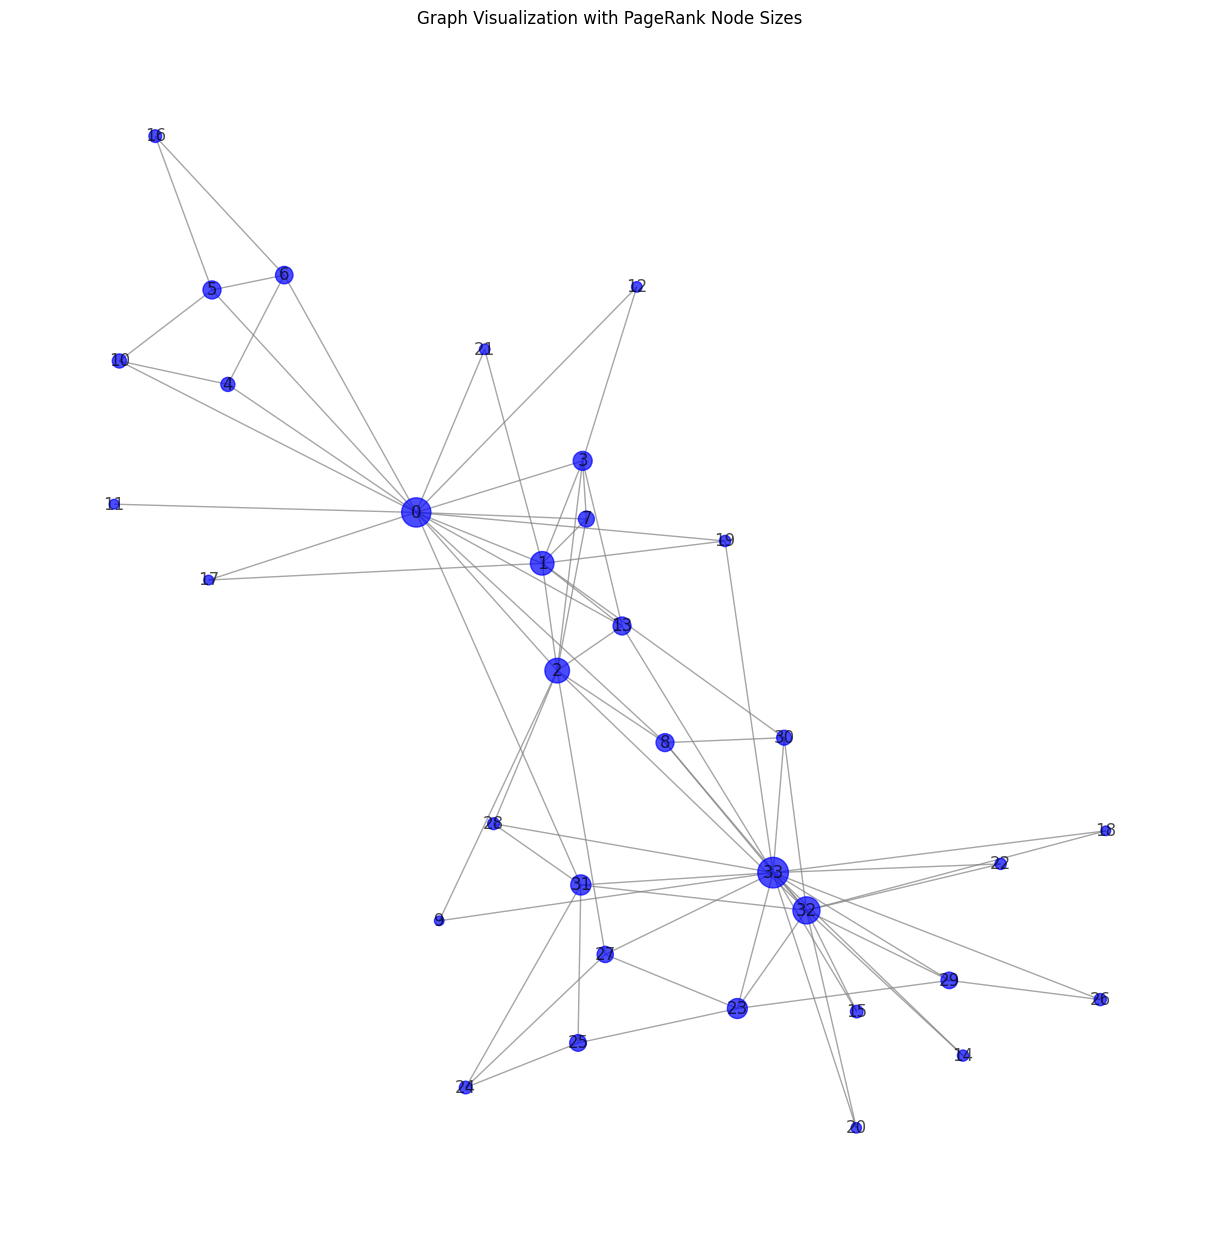

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Using a sample dataset from NetworkX (e.g., Karate club graph)
G = nx.karate_club_graph()
'''
Zachary's Karate Club Graph
Origin: This graph represents the social network of a university karate club
observed by Wayne Zachary in the 1970s. Zachary conducted a study of friendships
among the 34 members of the club over a period of two years.

Nodes: The graph has 34 nodes, each representing a member of the karate club.

Edges: The graph has 78 edges, representing the friendships between club
members. An edge between two nodes indicates that the two members were friends.

Split: During the study, a conflict led to the club splitting into two factions,
each aligning with one of the two instructors. This split is often used as a
real-world example of community detection in networks.
'''

# Function to implement PageRank
def pagerank(G, alpha=0.85, max_iter=100, tol=1e-6):
    nodes = list(G.nodes())
    n = len(nodes)
    M = nx.to_numpy_array(G, nodelist=nodes, dtype=float)
    M = M / M.sum(axis=0)  # Normalize columns to sum to 1

    # Teleportation matrix
    v = np.ones(n) / n

    # Initialize PageRank values
    pr = np.ones(n) / n

    for _ in range(max_iter):
        pr_new = alpha * M @ pr + (1 - alpha) * v
        if np.linalg.norm(pr - pr_new, ord=1) < tol:
            break
        pr = pr_new

    return dict(zip(nodes, pr))

# Apply PageRank
pr = pagerank(G)

# Convert to DataFrame for easier analysis
pr_df = pd.DataFrame(list(pr.items()), columns=['Node', 'PageRank'])

# Display top 10 nodes by PageRank
top_10 = pr_df.sort_values(by='PageRank', ascending=False).head(10)
print(top_10)

# Visualize the graph with PageRank as node size
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
node_size = [pr[node] * 5000 for node in G.nodes()]
nx.draw(G, pos, node_size=node_size, node_color='blue', with_labels=True, font_size=12, alpha=0.7, edge_color='gray')
plt.title('Graph Visualization with PageRank Node Sizes')
plt.show()


The PageRank values in the output represent the importance or influence of each node in the network. Higher PageRank values indicate more influential nodes. Here’s a brief interpretation of the top 10 nodes:

Node 33: Has the highest influence with a PageRank of 0.096989.
Node 0: Second most influential with a PageRank of 0.088501.
Node 32: Third with a PageRank of 0.075934.
Nodes 2, 1, 31, 23, 3, 5, and 13: Also influential but with lower PageRank values.
In summary, Node 33 is the most central and influential node in the Karate club graph, followed by Nodes 0 and 32. This means these nodes have more connections or are more strategically positioned within the network.

Interpretation of PageRank Results:
PageRank is an algorithm used to rank the importance of nodes in a network, often used for ranking web pages. In this context:

Node Influence: Nodes with higher PageRank scores (like Node 33, 0, and 32) are considered more influential or important within the network.
Network Centrality: These nodes likely have more connections or are positioned strategically, influencing the network more significantly.
Practical Meaning:
Node 33: This node is the most influential, meaning it has many direct connections or is connected to other high-ranking nodes.
Node 0 and 32: These nodes are also highly influential, playing key roles in the network's connectivity.
Application:
In social networks, these influential nodes could represent key individuals or hubs crucial for information spread or network stability. Identifying such nodes can help in targeting marketing efforts, spreading information, or understanding network vulnerabilities.

# **Project 4: Plant Leave Recognizer**


In [ ]:
!ls

1-3m-linkedin-jobs-and-skills-2024.zip		      linkedin_job_postings.csv
art_images					      museo_del_prado_artworks
art-images-drawings-painting-sculpture-engraving.zip  museo-del-prado-artworks.zip
job_skills.csv					      sample_data
job_summary.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import tarfile
import matplotlib.pyplot as plt
import numpy as np

# Define paths
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
dataset_path = tf.keras.utils.get_file('flower_photos.tgz', origin=dataset_url, extract=False)
dataset_dir = os.path.join(os.path.dirname(dataset_path), 'flower_photos')

# Extract the tar file
with tarfile.open(dataset_path, 'r:gz') as tar:
    tar.extractall(path=os.path.dirname(dataset_path))

# Create ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

# Validation data generator
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Build the model with MobileNetV2
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model and save the history object
history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[early_stopping])


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
92/92 [==============================] - 596s 6s/step - loss: 0.5605 - accuracy: 0.8074 - val_loss: 7.6339 - val_accuracy: 0.5376
Epoch 2/20
92/92 [==============================] - 572s 6s/step - loss: 0.3709 - accuracy: 0.8683 - val_loss: 8.0768 - val_accuracy: 0.4938
Epoch 3/20
92/92 [==============================] - 545s 6s/step - loss: 0.3001 - accuracy: 0.9003 - val_loss: 9.0331 - val_accuracy: 0.2339
Epoch 4/20
92/92 [==============================] - 564s 6s/step - loss: 0.2530 - accuracy: 0.9177 - val_loss: 9.6811 - val_accuracy: 0.3584


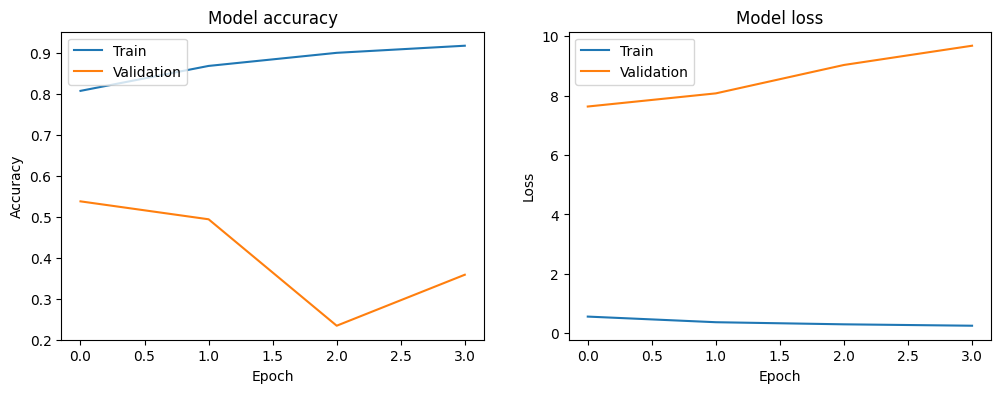

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is the history object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


1/1 [==============================] - 0s 53ms/step


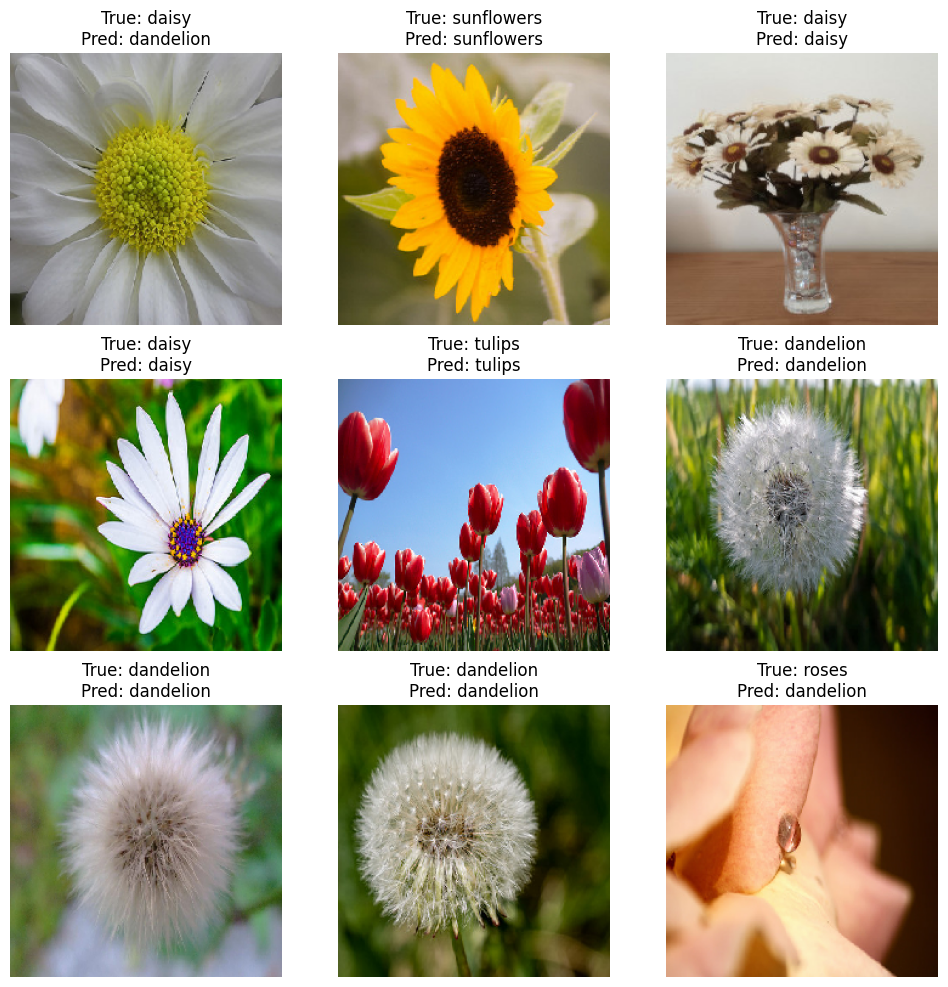

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Function to plot images with predictions
def plot_image_predictions(model, generator, class_labels):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img, label = next(generator)
        img = img[0]
        label = label[0]
        pred = model.predict(np.expand_dims(img, axis=0))
        pred_label = class_labels[np.argmax(pred)]
        true_label = class_labels[np.argmax(label)]
        plt.imshow(img)
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.show()

# Assuming class_labels are the class names from the generator
class_labels = list(train_generator.class_indices.keys())

# Plot predictions
plot_image_predictions(model, val_generator, class_labels)


A plant leaf recognizer is an application of machine learning and computer vision techniques designed to identify plant species or detect plant diseases based on images of leaves. This system leverages various image processing and classification algorithms to analyze the visual features of leaf images and classify them accordingly.

### How It Works:
1. **Data Collection**: Gather a dataset of leaf images. These images can include different species of plants or different conditions of leaves (healthy, diseased, etc.).
2. **Data Preprocessing**: Prepare the dataset by resizing images, normalizing pixel values, and possibly augmenting the data (e.g., rotating, flipping) to increase the dataset size.
3. **Feature Extraction**: Use techniques such as edge detection, color histograms, or texture analysis to extract meaningful features from the leaf images.
4. **Model Training**: Train a machine learning model using the extracted features. Common models include convolutional neural networks (CNNs) which are effective in image classification tasks.
5. **Model Evaluation**: Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score.
6. **Prediction**: Use the trained model to predict the class of new, unseen leaf images.

### Applications:
1. **Species Identification**: Helps in identifying plant species based on their leaf characteristics.
2. **Disease Detection**: Identifies diseases in plants by analyzing the visual symptoms on leaves.
3. **Agriculture and Botany**: Assists farmers and botanists in monitoring plant health and managing crops effectively.

This code demonstrates the process of building a plant leaf recognizer from data loading to prediction. The key steps involve preparing the data, building a neural network model, training the model, and making predictions on new images. For real-world applications, you can use more sophisticated models and larger datasets to improve accuracy and robustness.